## Lib and dat imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('raw_data/air_pollution_data.csv')
df.head(2)


,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1


## Basic checks of df

In [3]:
#dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [4]:
#null values check
df.isna().sum()

who_region                0
iso3                      0
country_name              0
city                      0
year                      3
version                   0
pm10_concentration    11426
pm25_concentration    18368
no2_concentration     13164
pm10_tempcov          17695
pm25_tempcov          23508
no2_tempcov           16696
type_of_stations      16767
reference             33446
web_link              38308
population            17665
population_source     21996
latitude                  0
longitude                 0
who_ms                    0
dtype: int64

In [5]:
#null value percentage
df.isna().sum()/len(df)*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.000000
year                   0.007482
version                0.000000
pm10_concentration    28.495187
pm25_concentration    45.807771
no2_concentration     32.829568
pm10_tempcov          44.129383
pm25_tempcov          58.626365
no2_tempcov           41.637987
type_of_stations      41.815053
reference             83.410644
web_link              95.535937
population            44.054566
population_source     54.855604
latitude               0.000000
longitude              0.000000
who_ms                 0.000000
dtype: float64

In [ ]:
#drop irrrelvent columns
df = df.drop(columns=['version', 'web_link', 'who_ms','reference', 'population_source'])
df.info()

## EDA and plots

<Figure size 1000x600 with 0 Axes>

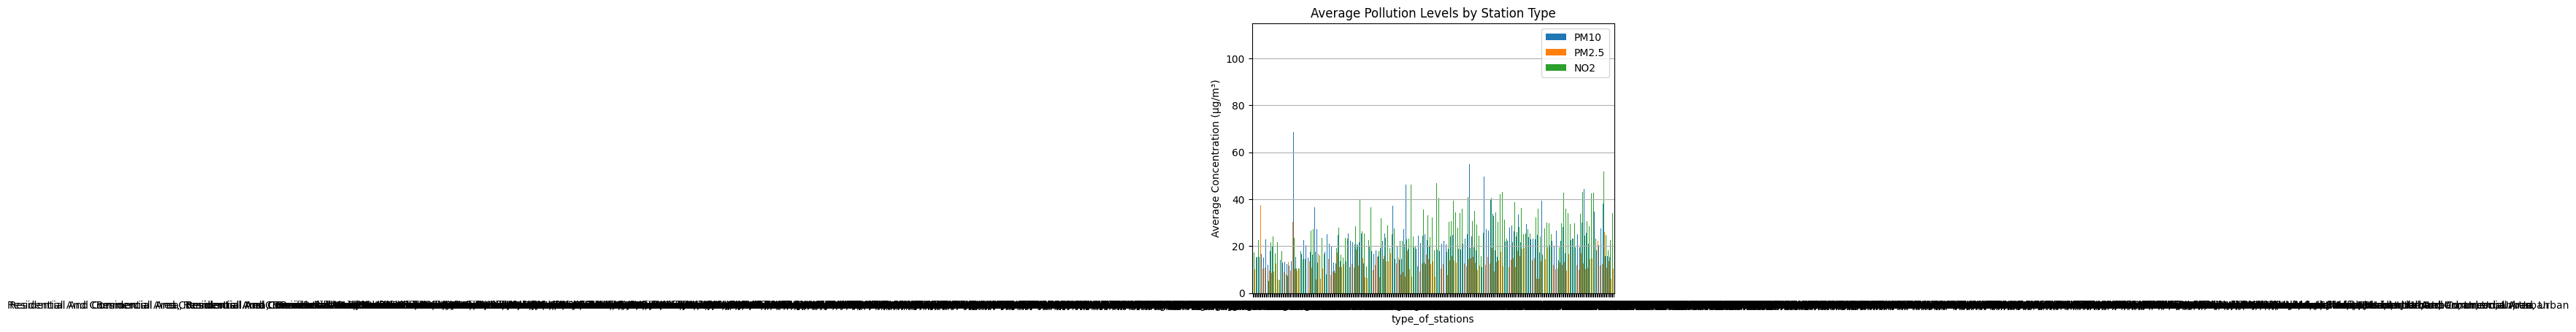

In [11]:
# Group by 'type_of_stations' and calculate mean concentrations
station_type_mean = df.groupby('type_of_stations')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean()

# Plotting
plt.figure(figsize=(10, 6))

station_type_mean.plot(kind='bar', width=0.8)
plt.title('Average Pollution Levels by Station Type')
#plt.xlabel('Station Type')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=0)
plt.legend(['PM10', 'PM2.5', 'NO2'])
plt.grid(axis='y')

#plt.tight_layout()
plt.show()

/tmp/ipykernel_156073/3308671275.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


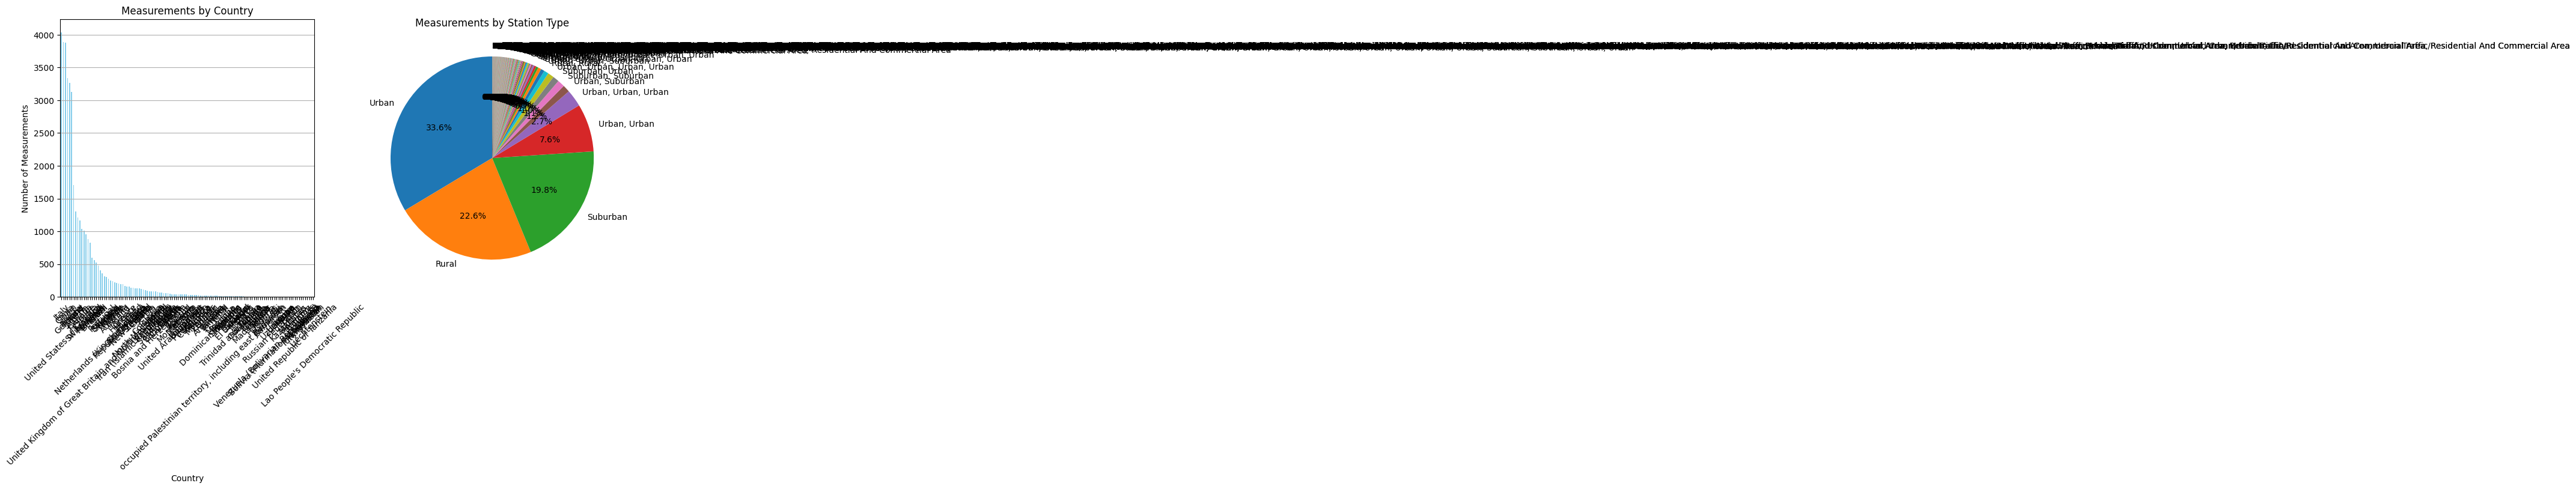

In [12]:
##PLOT number of countries and stattions
# Counting measurements by country
country_counts = df['country_name'].value_counts()

# Counting measurements by station type
station_type_counts = df['type_of_stations'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting country counts
plt.subplot(1, 2, 1)
country_counts.plot(kind='bar', color='skyblue')
plt.title('Measurements by Country')
plt.xlabel('Country')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plotting station type counts
plt.subplot(1, 2, 2)
station_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Measurements by Station Type')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [20]:
#create a stations df to show the station counts, excluding nans
stations = pd.DataFrame(df.type_of_stations.value_counts()).reset_index()
stations.columns = ['station_type', 'no_of_stations']


In [21]:
#print stations df
stations.head(50)

,station_type,no_of_stations
0,Urban,7841
1,Rural,5272
2,Suburban,4631
3,"Urban, Urban",1778
4,"Urban, Urban, Urban",637
5,"Urban, Suburban",269
6,"Suburban, Suburban",267
7,"Suburban, Urban",234
8,"Urban, Urban, Urban, Urban",230
9,"Rural, Rural",170


In [23]:
#create copy of df
df3 = df.copy()


## Clean up process 1 - to add to py

In [25]:
#there are duplicated/concatenated strings with same name as can be see from above e.g. Urban, urban can be renamed as just Urban
#current data type is object. will need to convert this to string in order to clean this up

#Convert 'type_of_stations' column into string
df3['type_of_stations'] = df3['type_of_stations'].astype('string')

In [26]:
#verify/check result of dtype conversion
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  string 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [32]:
#Create function to simplify type of station names. Add this to py file
def simplify_station_type(station_type):
    # Split the string by ', ', create a set to remove duplicates, and join back to a string
    if pd.isna(station_type):
        return "unknown"
    unique_types = sorted(set(station_type.split(', '))) ##source >> https://www.geeksforgeeks.org/remove-duplicates-given-string-python/##
    return ', '.join(unique_types)


In [39]:
# Apply the simplification to the 'type_of_stations' column
df3['simplified_station_type'] = df3['type_of_stations'].apply(simplify_station_type)
df3.head(5)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban"
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban"
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"


In [40]:
#Create an new stations df to see the overall picture of update station names
stations3 = pd.DataFrame(df3.simplified_station_type.value_counts()).reset_index()
stations3.columns = ['station_type', 'no_of_stations']
stations3['%_of_data'] = stations3.no_of_stations/stations3.no_of_stations.sum()*100
stations3.head(50)


,station_type,no_of_stations,%_of_data
0,unknown,16767,41.815053
1,Urban,10738,26.779390
2,Rural,5457,13.609158
3,Suburban,4930,12.294878
4,"Suburban, Urban",1473,3.673500
5,"Rural, Urban",172,0.428949
6,"Rural, Suburban, Urban",156,0.389047
7,"Rural, Suburban",127,0.316724
8,Background,76,0.189536
9,Residential And Commercial Area,69,0.172078


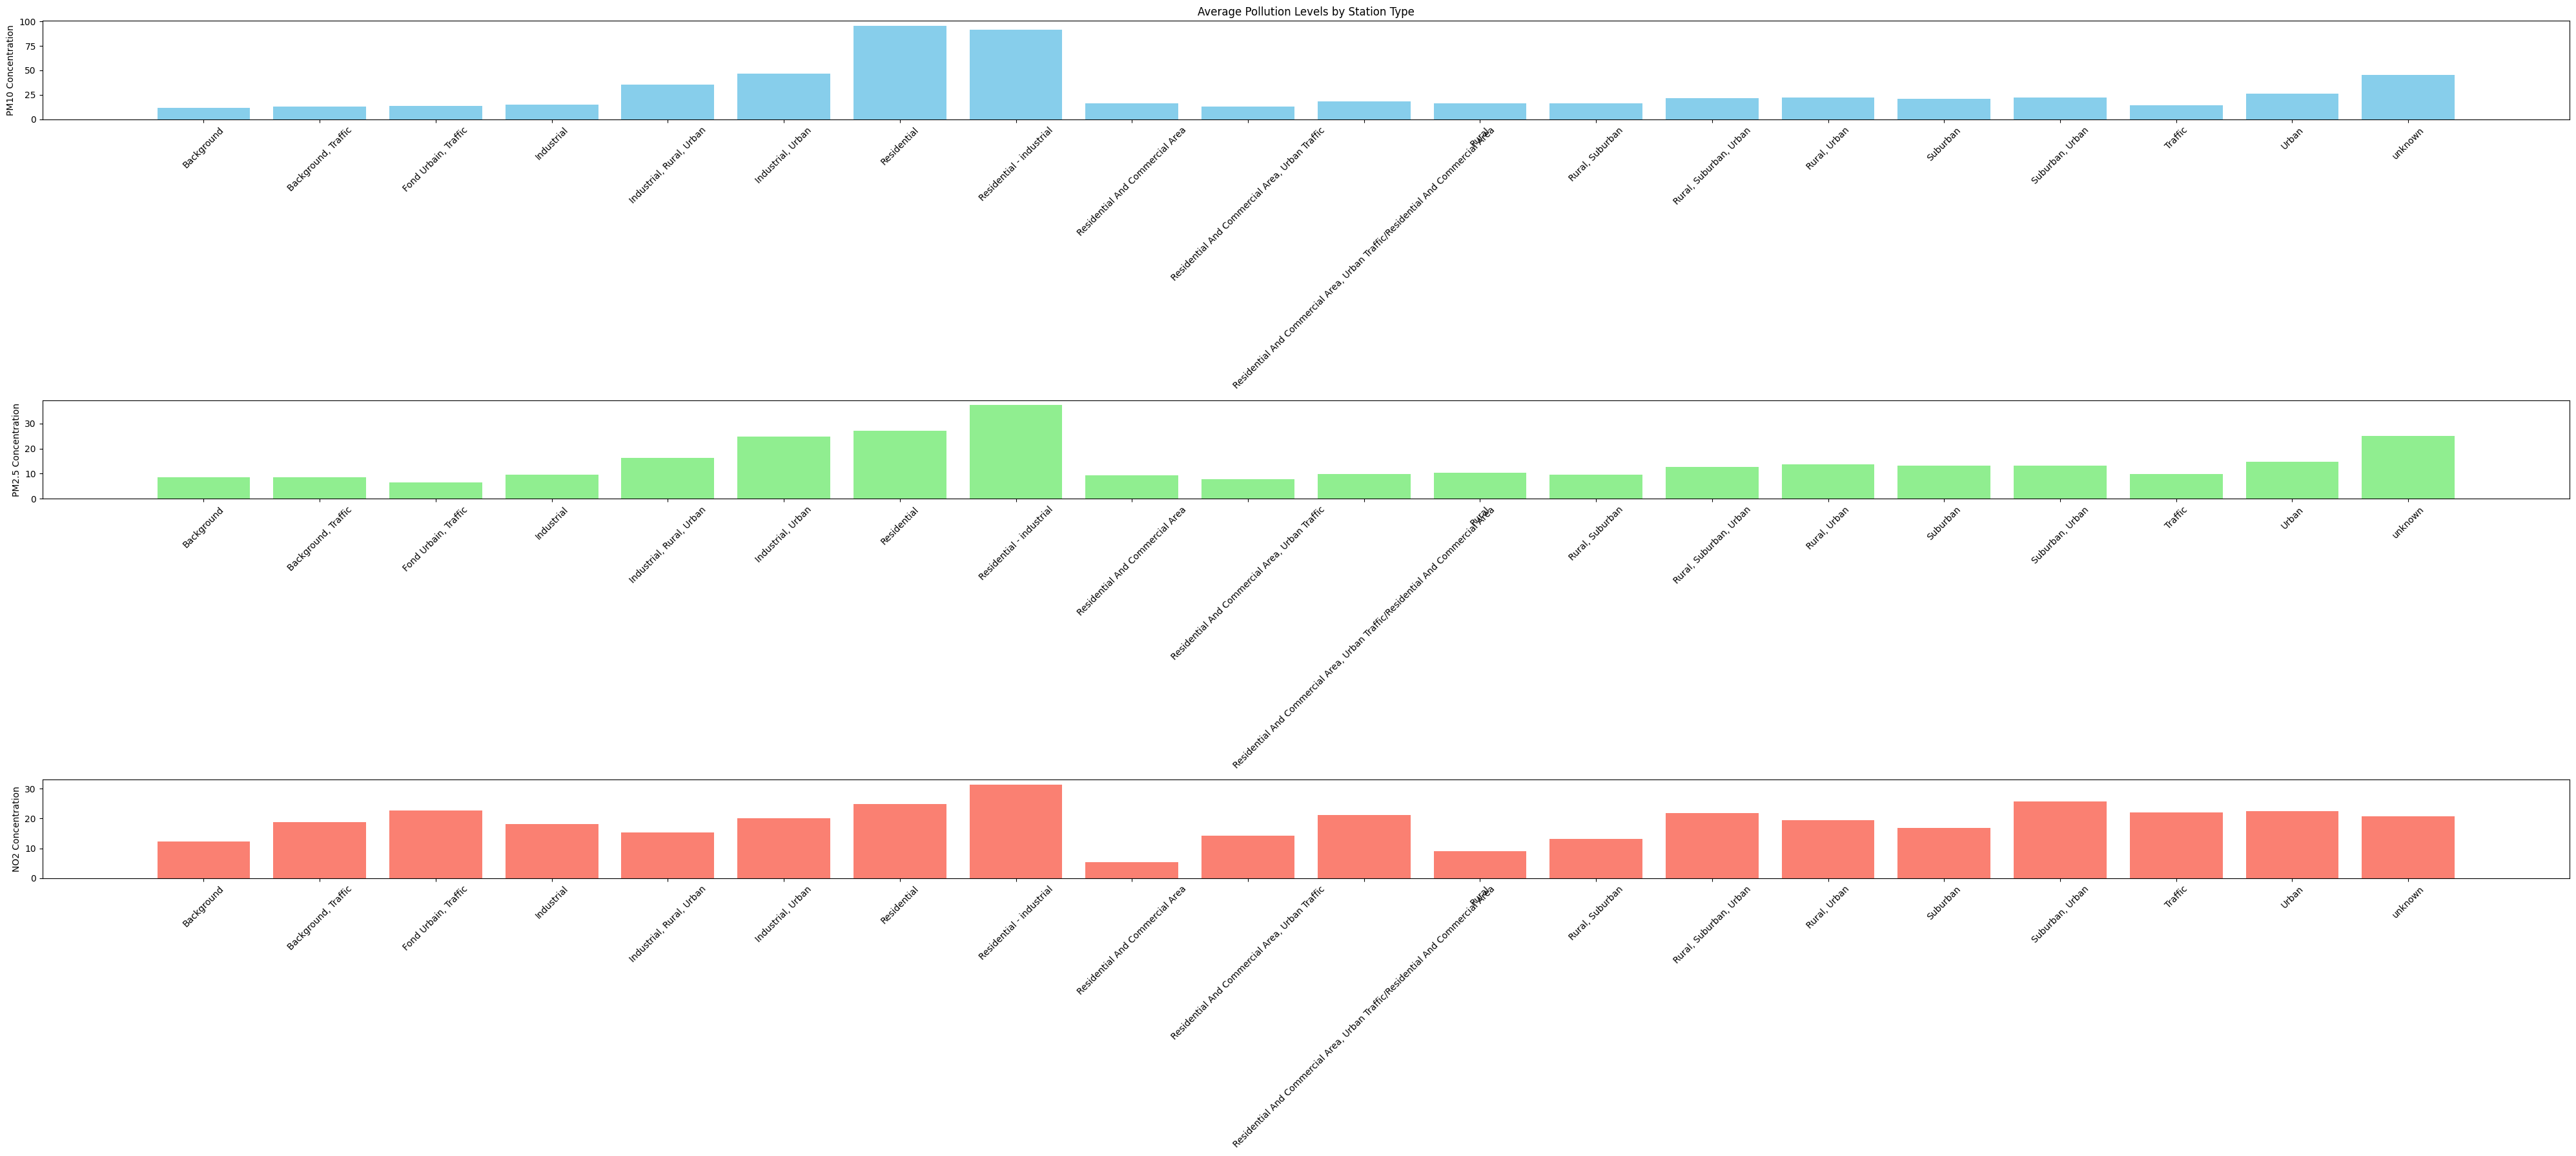

In [41]:
#Create plot to visualise average pollution per station type
import pandas as pd
import matplotlib.pyplot as plt


plot_df = df3[['simplified_station_type', 'pm10_concentration', 'pm25_concentration', 'no2_concentration']]

# Calculate average pollution levels by station type
avg_pollution = plot_df.groupby('simplified_station_type').mean()

# Plotting
plt.figure(figsize=(40,18))

# Bar plot for pm10_concentration
plt.subplot(3, 1, 1)  # 3 rows, 1 column, plot 1
plt.bar(avg_pollution.index, avg_pollution['pm10_concentration'], color='skyblue')
plt.ylabel('PM10 Concentration')
plt.title('Average Pollution Levels by Station Type')
plt.xticks(rotation=45)

# Bar plot for pm25_concentration
plt.subplot(3, 1, 2)  # 3 rows, 1 column, plot 2
plt.bar(avg_pollution.index, avg_pollution['pm25_concentration'], color='lightgreen')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)

# Bar plot for no2_concentration
plt.subplot(3, 1, 3)  # 3 rows, 1 column, plot 3
plt.bar(avg_pollution.index, avg_pollution['no2_concentration'], color='salmon')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Clean up process 2 - add to py

***
1. As seen in stations3 df above and plots above, 41% of station data is missing.
2. Will need to impute station types based on pollution metrics of known station types
3. For simple function, will apply this to whole dataset. For advanced stages, we can update funtion to impute per country
***

In [42]:
df5 = df3.copy()
df5.head(10)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban"
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban"
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
5,4_Eur,ESP,Spain,A Coruna/ESP,2018.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",27.763,14.876,20.328,98.0,...,99.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
6,4_Eur,ESP,Spain,A Coruna/ESP,2019.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.912,13.017,18.339,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
7,4_Eur,ESP,Spain,A Coruna/ESP,2020.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",24.900,12.926,13.749,99.0,...,99.0,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban"
8,4_Eur,ESP,Spain,A Coruna/ESP,2021.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",23.228,11.617,15.670,99.0,...,99.0,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban"
9,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2015.0,V5.0 (2022),NaN,33.015,NaN,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,38.839500,105.692150,1,unknown


In [43]:
# Manually map known types of stations to numerical labels from stations3 df
type_mapping = {
    'Unknown': np.nan, #will need this to be nan for imputer to work
    'Urban': 1,
    'Rural': 2,
    'Suburban': 3,
    'Suburban, Urban': 4,
    'Rural, Urban': 5,
    'Rural, Suburban, Urban': 6,
    'Rural, Suburban': 7,
    'Background': 8,
    'Residential And Commercial Area': 9,
    'Traffic': 10,
    'Residential And Commercial Area, Urban Traffic': 11,
    'Background, Traffic': 12,
    'Industrial': 13,
    'Residential And Commercial Area, Urban Traffic': 14,
    'Industrial, Urban': 15,
    'Industrial, Rural, Urban': 16,
    'Residential': 17,
    'Fond Urbain, Traffic': 18,
    'Residential - industrial': 19
}

df5['encoded_station_type'] = df5['simplified_station_type'].map(type_mapping)

In [45]:
#check/verify above
df5.head(12)


,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type,encoded_station_type
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban",4.0
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban",4.0
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0
5,4_Eur,ESP,Spain,A Coruna/ESP,2018.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",27.763,14.876,20.328,98.0,...,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0
6,4_Eur,ESP,Spain,A Coruna/ESP,2019.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.912,13.017,18.339,98.0,...,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0
7,4_Eur,ESP,Spain,A Coruna/ESP,2020.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",24.900,12.926,13.749,99.0,...,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban",4.0
8,4_Eur,ESP,Spain,A Coruna/ESP,2021.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",23.228,11.617,15.670,99.0,...,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban",4.0
9,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2015.0,V5.0 (2022),NaN,33.015,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,38.839500,105.692150,1,unknown,NaN


In [46]:
#import KNN imputer
from sklearn.impute import KNNImputer


# Select features for imputation
features = ['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'encoded_station_type'] #features to be learned by imputer

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df5[features])
df_imputed

array([[2.32380e+01, 1.14910e+01, 2.88410e+01, 4.00000e+00],
       [2.74760e+01, 1.58780e+01, 1.95750e+01, 4.00000e+00],
       [2.55150e+01, 1.40040e+01, 2.27310e+01, 4.00000e+00],
       ...,
       [5.55680e+01, 3.10130e+01, 2.80000e-02, 1.00000e+00],
       [4.94378e+01, 3.06490e+01, 2.16712e+01, 1.40000e+00],
       [4.38148e+01, 2.97310e+01, 2.25974e+01, 1.60000e+00]])

In [47]:
# Assign imputed values back to DataFrame
df5['encoded_station_type_imputed'] = df_imputed[:, -1]  # Assuming encoded_station_type is the last column after imputation

In [48]:
#check a sample in df
df5.head(20)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,reference,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type,encoded_station_type,encoded_station_type_imputed
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban",4.0,4.0
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban",4.0,4.0
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0
5,4_Eur,ESP,Spain,A Coruna/ESP,2018.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",27.763,14.876,20.328,98.0,...,NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0
6,4_Eur,ESP,Spain,A Coruna/ESP,2019.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.912,13.017,18.339,98.0,...,NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0
7,4_Eur,ESP,Spain,A Coruna/ESP,2020.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",24.900,12.926,13.749,99.0,...,NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban",4.0,4.0
8,4_Eur,ESP,Spain,A Coruna/ESP,2021.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",23.228,11.617,15.670,99.0,...,NaN,NaN,247604.0,NaN,43.371467,-8.423667,1,"Suburban, Urban",4.0,4.0
9,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2015.0,V5.0 (2022),NaN,33.015,NaN,NaN,...,NaN,NaN,NaN,NaN,38.839500,105.692150,1,unknown,NaN,2.2


In [49]:
#check if encoded imputed station types has nan values
df5.isna().sum()

who_region                          0
iso3                                0
country_name                        0
city                                0
year                                3
version                             0
pm10_concentration              11426
pm25_concentration              18368
no2_concentration               13164
pm10_tempcov                    17695
pm25_tempcov                    23508
no2_tempcov                     16696
type_of_stations                16767
reference                       33446
web_link                        38308
population                      17665
population_source               21996
latitude                            0
longitude                           0
who_ms                              0
simplified_station_type             0
encoded_station_type            16774
encoded_station_type_imputed        0
dtype: int64

In [114]:
# Revert encoded_station_type back to original categorical values
reverse_mapping = {v: k for k, v in type_mapping.items() if pd.notna(v)}  # Reverse mapping excluding NaNs. source >> https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping

df5['final_station_type'] = df5['encoded_station_type_imputed'].round().astype(int).map(reverse_mapping).fillna(np.nan)

In [118]:
df5.drop(columns=['simplified_station_type_final'],inplace=True)

In [119]:
#check sample previously labelled unknow station to see if all imputed
df5_unknown = df5[df5['simplified_station_type'] == 'unknown']
df5_unknown

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type,encoded_station_type,encoded_station_type_imputed,final_station_type
9,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2015.0,V5.0 (2022),NaN,33.015,NaN,NaN,...,NaN,NaN,NaN,38.839500,105.692150,1,unknown,NaN,2.2,Rural
10,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2016.0,V5.0 (2022),NaN,34.394,NaN,NaN,...,NaN,NaN,NaN,38.839500,105.692150,1,unknown,NaN,1.0,Urban
11,4_Eur,DEU,Germany,Aachen/DEU,2010.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",25.955,NaN,37.283,98.0,...,NaN,259160.0,"old database, old database, old database, old ...",50.763918,6.094849,1,unknown,NaN,1.0,Urban
21,4_Eur,CHE,Switzerland,Aadorf/CHE,2010.0,"V4.0 (2018), V4.0 (2018)",16.271,NaN,14.170,100.0,...,NaN,7301.0,"manual, manual",47.479767,8.904696,1,unknown,NaN,1.8,Rural
22,4_Eur,CHE,Switzerland,Aadorf/CHE,2013.0,"V4.0 (2018), V4.0 (2018)",15.295,NaN,13.745,NaN,...,NaN,7301.0,"manual, manual",47.479800,8.904680,1,unknown,NaN,2.2,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40093,6_Wpr,KOR,Republic of Korea,경기도/KOR,2017.0,V5.0 (2022),57.335,36.457,0.029,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.6,Rural
40094,6_Wpr,KOR,Republic of Korea,경기도/KOR,2018.0,V5.0 (2022),50.838,31.586,0.027,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.4,Urban
40095,6_Wpr,KOR,Republic of Korea,경기도/KOR,2019.0,V5.0 (2022),55.568,31.013,0.028,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.0,Urban
40096,6_Wpr,CHN,China,虎英公园北/CHN,2018.0,V5.0 (2022),NaN,30.649,NaN,NaN,...,NaN,NaN,NaN,23.012778,113.794444,1,unknown,NaN,1.4,Urban


## Checks to see if imputed ok

In [120]:
#check for nans and investigate
df5.isna().sum()

who_region                          0
iso3                                0
country_name                        0
city                                0
year                                3
version                             0
pm10_concentration              11426
pm25_concentration              18368
no2_concentration               13164
pm10_tempcov                    17695
pm25_tempcov                    23508
no2_tempcov                     16696
type_of_stations                16767
reference                       33446
web_link                        38308
population                      17665
population_source               21996
latitude                            0
longitude                           0
who_ms                              0
simplified_station_type             0
encoded_station_type            16774
encoded_station_type_imputed        0
final_station_type                  1
dtype: int64

In [122]:
#see field whith unknown
df5_unknown[df5_unknown['final_station_type'].isna()]

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type,encoded_station_type,encoded_station_type_imputed,final_station_type
21720,6_Wpr,NZL,New Zealand,Matamata/NZL,2012.0,"V5.0 (2022), V3.0 (2016)",12.5,NaN,NaN,99.0,...,NaN,7010.0,"old database, old database",-37.841202,175.82814,1,unknown,NaN,11.2,NaN


In [123]:
df5_unknown.final_station_type.value_counts()

final_station_type
Rural                              7741
Urban                              5879
Suburban                           1539
Suburban, Urban                     677
Rural, Urban                        309
Rural, Suburban, Urban              239
Rural, Suburban                     172
Background                          110
Residential And Commercial Area      47
Background, Traffic                  40
Traffic                              13
Name: count, dtype: int64

In [130]:
df5.simplified.notna().sum()

23331

In [129]:
# Verify that original station types were not changed by imputing process
df5['station_types_unchanged'] = (df5['simplified_station_type'] == df5['final_station_type'])

# Count how many rows have unchanged station types
unchanged_count = df5['station_types_unchanged'].sum()

print(f"Number of rows where original station types were unchanged: {unchanged_count}")


Number of rows where original station types were unchanged: 23324


In [134]:
# Filter rows where station type is not 'unknown'
non_unknown_df5 = df5[df5['simplified_station_type'] != 'unknown']

# Check if the non-'unknown' station types match the final station types
non_unknown_unchanged = non_unknown_df5['simplified_station_type'] == non_unknown_df5['final_station_type']

# Count how many non-'unknown' station types were unchanged
non_unknown_unchanged_count = non_unknown_unchanged.sum()

print(f"Number of non-'unknown' station types unchanged: {non_unknown_unchanged_count}")

Number of non-'unknown' station types unchanged: 23324


In [132]:
changed_df = df5[df5['station_types_unchanged'] == False]

In [137]:
len(changed_df)

16774

In [140]:
#check for difference between changed_df and simplified_station_type
(df5['simplified_station_type'] == 'unknown').sum() - len(changed_df)

# Conckusion - difference is 7, not material. Minor issue with encoding - to double check with others.

-7

## Plots final

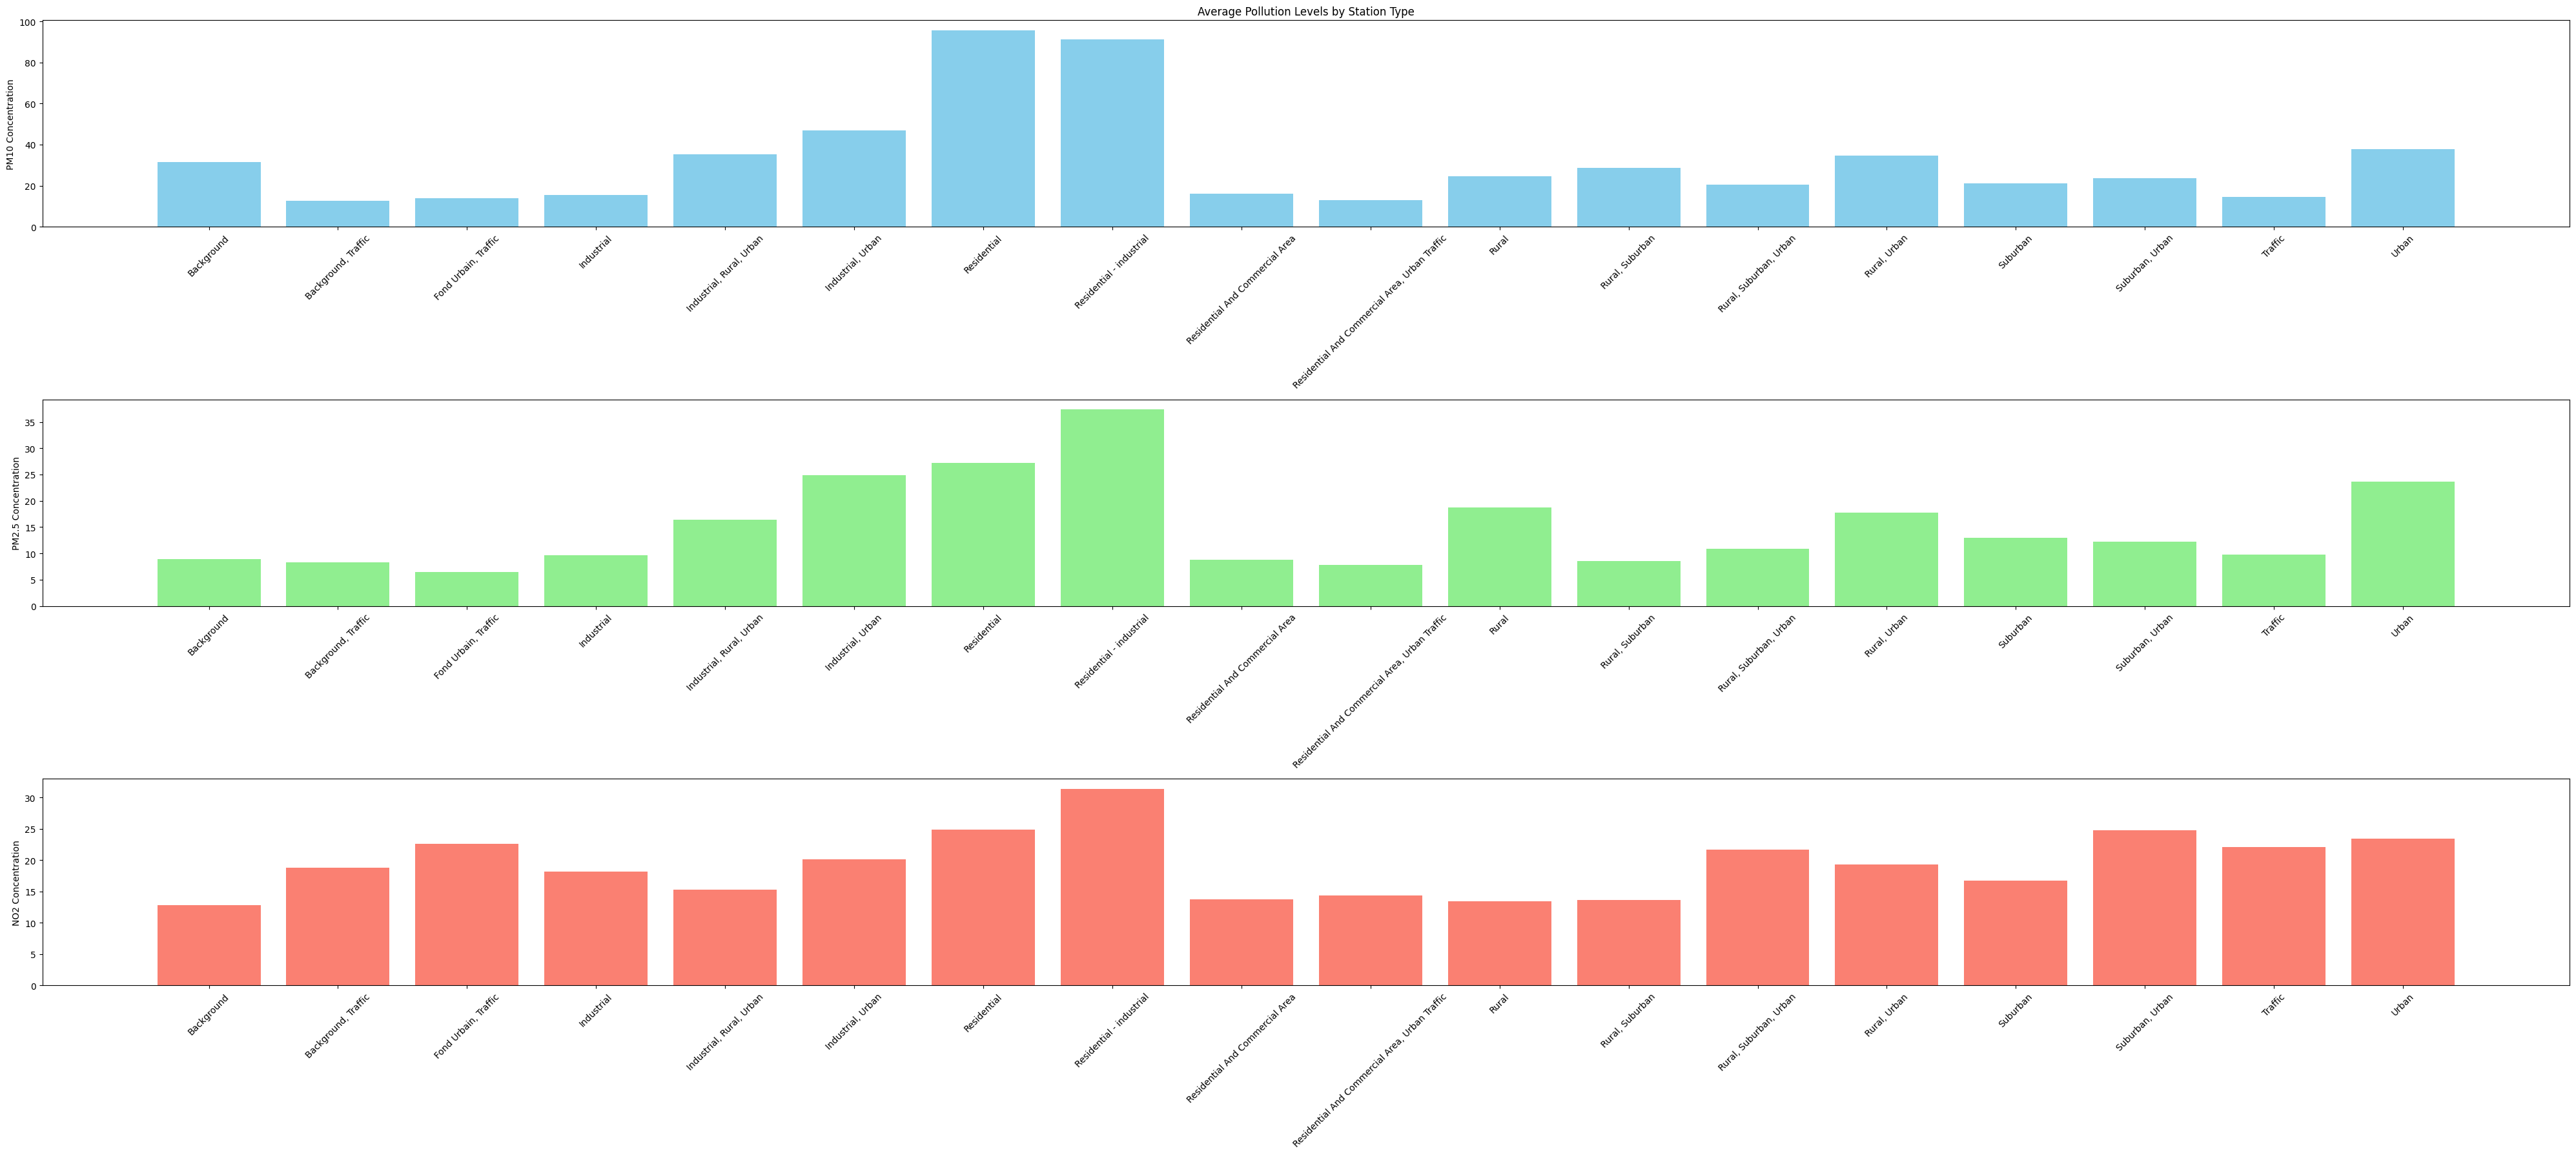

In [125]:
#plot updated pollution per station type
import pandas as pd
import matplotlib.pyplot as plt


plot_df = df5[['final_station_type', 'pm10_concentration', 'pm25_concentration', 'no2_concentration']]

# Calculate average pollution levels by station type
avg_pollution = plot_df.groupby('final_station_type').mean()

# Plotting
plt.figure(figsize=(40,18))

# Bar plot for pm10_concentration
plt.subplot(3, 1, 1)  # 3 rows, 1 column, plot 1
plt.bar(avg_pollution.index, avg_pollution['pm10_concentration'], color='skyblue')
plt.ylabel('PM10 Concentration')
plt.title('Average Pollution Levels by Station Type')
plt.xticks(rotation=45)

# Bar plot for pm25_concentration
plt.subplot(3, 1, 2)  # 3 rows, 1 column, plot 2
plt.bar(avg_pollution.index, avg_pollution['pm25_concentration'], color='lightgreen')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)

# Bar plot for no2_concentration
plt.subplot(3, 1, 3)  # 3 rows, 1 column, plot 3
plt.bar(avg_pollution.index, avg_pollution['no2_concentration'], color='salmon')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

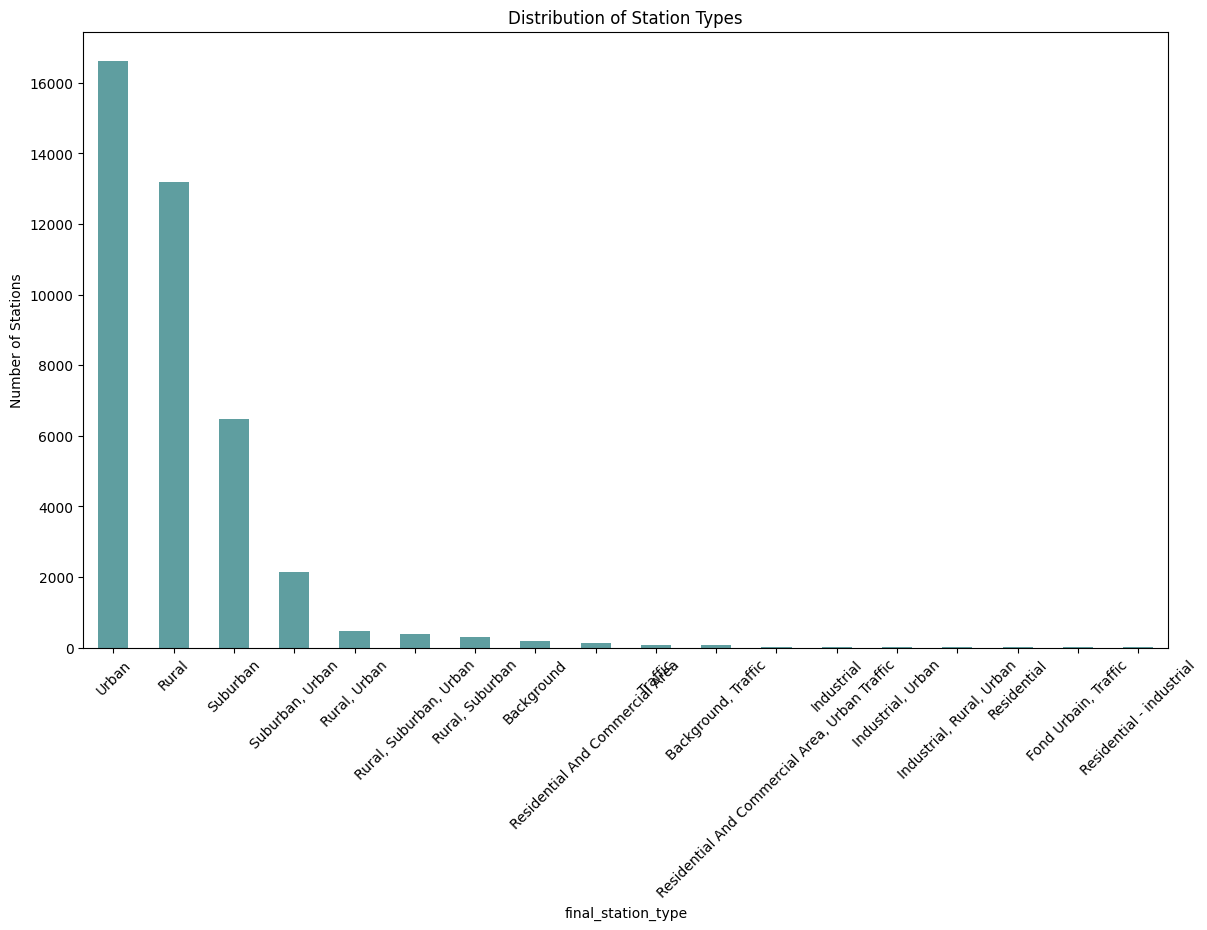

In [126]:
# Calculate station type distribution
station_type_counts = df5['final_station_type'].value_counts()

# Plotting
plt.figure(figsize=(14, 8))
station_type_counts.plot(kind='bar', color='cadetblue')
plt.ylabel('Number of Stations')
plt.title('Distribution of Station Types')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_156073/4019093885.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x='pm10_concentration', hue='simplified_station_type_final', common_norm=False)
/tmp/ipykernel_156073/4019093885.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x='pm25_concentration', hue='simplified_station_type_final', common_norm=False)
/tmp/ipykernel_156073/4019093885.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x='no2_concentration', hue='simplified_station_type_final', common_norm=False)


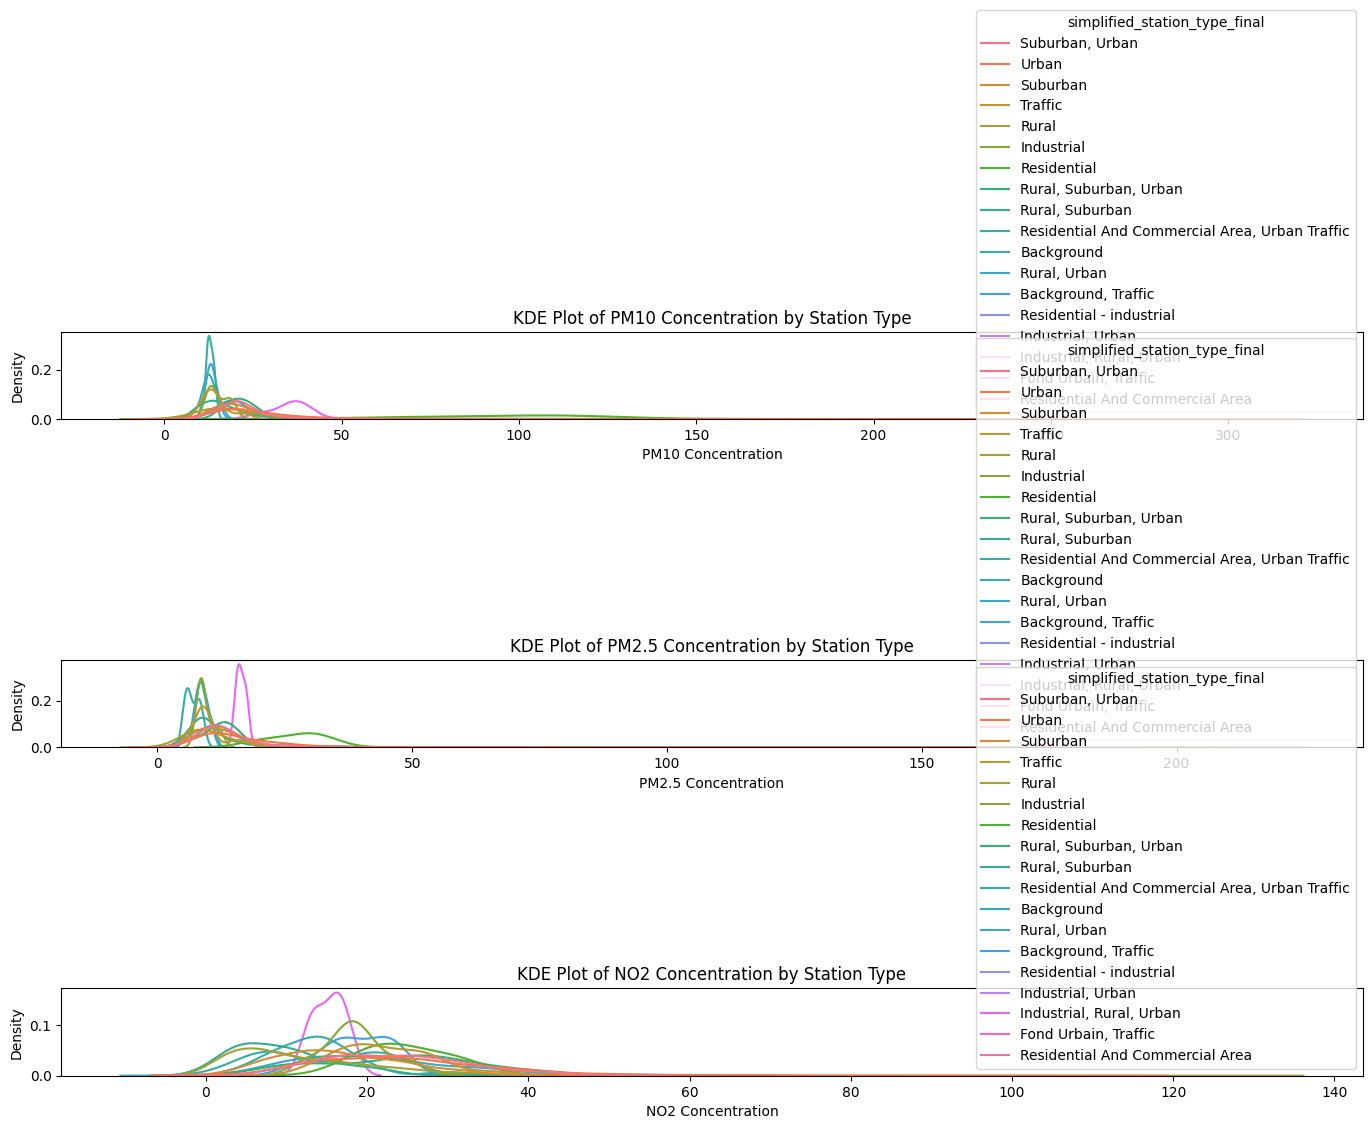

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kde_pollution_levels(df):
    plot_df = df[['simplified_station_type_final', 'pm10_concentration', 'pm25_concentration', 'no2_concentration']]

    # Filter out NaN values
    plot_df = plot_df.dropna(subset=['pm10_concentration', 'pm25_concentration', 'no2_concentration'])

    # Plotting
    plt.figure(figsize=(14, 10))

    # KDE plot for PM10 concentration
    plt.subplot(3, 1, 1)
    sns.kdeplot(data=plot_df, x='pm10_concentration', hue='simplified_station_type_final', common_norm=False)
    plt.title('KDE Plot of PM10 Concentration by Station Type')
    plt.xlabel('PM10 Concentration')
    plt.ylabel('Density')

    # KDE plot for PM2.5 concentration
    plt.subplot(3, 1, 2)
    sns.kdeplot(data=plot_df, x='pm25_concentration', hue='simplified_station_type_final', common_norm=False)
    plt.title('KDE Plot of PM2.5 Concentration by Station Type')
    plt.xlabel('PM2.5 Concentration')
    plt.ylabel('Density')

    # KDE plot for NO2 concentration
    plt.subplot(3, 1, 3)
    sns.kdeplot(data=plot_df, x='no2_concentration', hue='simplified_station_type_final', common_norm=False)
    plt.title('KDE Plot of NO2 Concentration by Station Type')
    plt.xlabel('NO2 Concentration')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Call the function
plot_kde_pollution_levels(df5)


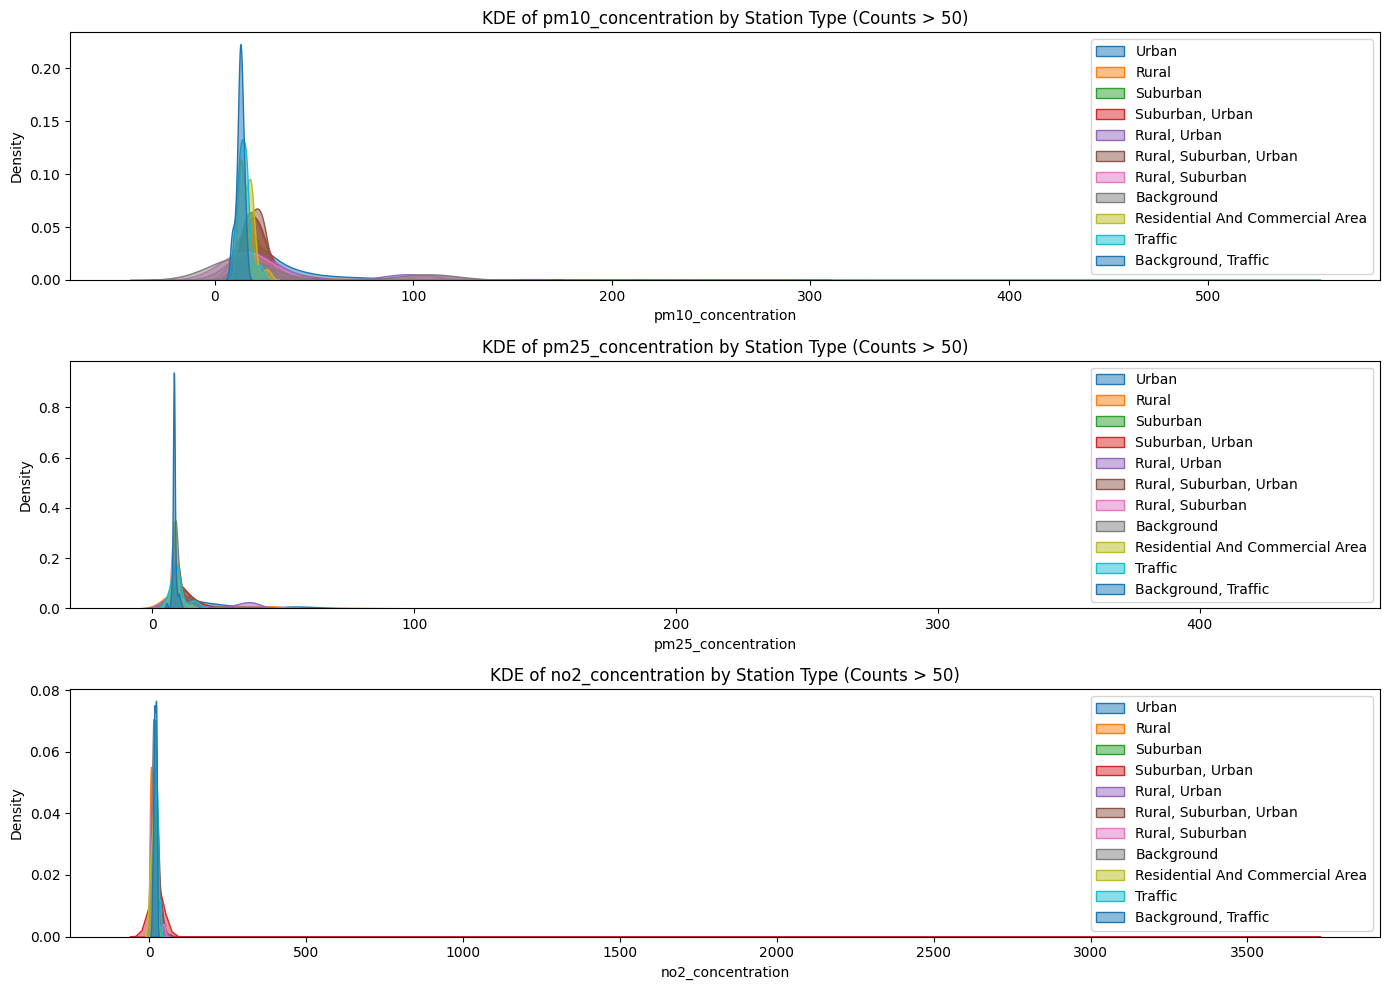

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_for_station_types(df, min_count=50):
    """
    Plot KDE for pollution metrics for station types with counts above a specified threshold.

    Args:
    - df (pandas.DataFrame): DataFrame containing pollution data.
    - min_count (int): Minimum count of station types to include in the plot.
    """
    # Count the number of occurrences of each station type
    station_type_counts = df['simplified_station_type_final'].value_counts()

    # Filter station types with counts above the threshold
    valid_station_types = station_type_counts[station_type_counts > min_count].index
    filtered_df = df[df['simplified_station_type_final'].isin(valid_station_types)]

    # Plotting
    pollutants = ['pm10_concentration', 'pm25_concentration', 'no2_concentration']
    plt.figure(figsize=(14, 10))

    for i, pollutant in enumerate(pollutants):
        plt.subplot(3, 1, i + 1)
        for station_type in valid_station_types:
            subset = filtered_df[filtered_df['simplified_station_type_final'] == station_type]
            sns.kdeplot(subset[pollutant].dropna(), label=station_type, fill=True, alpha=0.5)
        plt.xlabel(pollutant)
        plt.ylabel('Density')
        plt.title(f'KDE of {pollutant} by Station Type (Counts > {min_count})')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_kde_for_station_types(df5)


## FINAL functions

In [112]:
def simplify_stations(station_type):
    '''
    Simplifies the station type string by removing duplicates and sorting.

    Args:
    - station_type (str): A string containing station types separated by ', ' e.g. Urban, urban, urban.

    Returns:
    - str: Simplified station types joined into a single string e.g "Urban, urban, urban" returns "Urban"

    If station_type is NaN (missing), returns 'unknown'.'''

    if pd.isna(station_type):
        return "unknown"
    unique_types = sorted(set(station_type.split(', ')))
    return ', '.join(unique_types)


In [113]:
def simplified_station_type(df):
    '''
    Adds a new column 'simplified_station_type' to the DataFrame 'df' based on simplifying 'type_of_stations'.

    Args:
    - df (pandas.DataFrame): The DataFrame containing the column 'type_of_stations' to be simplified.

    Returns:
    - pandas.DataFrame: The input DataFrame 'df' with an additional column 'simplified_station_type'.

    This function applies the 'simplify_stations' function to each value in the 'type_of_stations' column
    and stores the simplified result in a new column 'simplified_station_type'
    '''

    df['type_of_stations'] = df['type_of_stations'].astype('string') #converts type_of_stations column into a string in order to apply simplify_stations function
    df['simplified_station_type'] = df['type_of_stations'].apply(simplify_stations)
    return df

In [142]:
def impute_stations(df):
    '''
    Imputes the values of missing type_of_stations based on similar pollution metrics of know types of stations using KNN imputer'''

    #first simplify station names using simplified_station_type function
    simplified_station_type(df)

    # Manually map known types of stations to numerical labels from stations3 df
    type_mapping = {
        'Unknown': np.nan, #will need this to be nan for imputer to work
        'Urban': 1,
        'Rural': 2,
        'Suburban': 3,
        'Suburban, Urban': 4,
        'Rural, Urban': 5,
        'Rural, Suburban, Urban': 6,
        'Rural, Suburban': 7,
        'Background': 8,
        'Residential And Commercial Area': 9,
        'Traffic': 10,
        'Residential And Commercial Area, Urban Traffic': 11,
        'Background, Traffic': 12,
        'Industrial': 13,
        'Residential And Commercial Area, Urban Traffic': 14,
        'Industrial, Urban': 15,
        'Industrial, Rural, Urban': 16,
        'Residential': 17,
        'Fond Urbain, Traffic': 18,
        'Residential - industrial': 19
    }

    df['encoded_station_type'] = df['simplified_station_type'].map(type_mapping) # encode simpified_station_type column to feed into KNN imputer

    # Select features for imputation
    features = ['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'encoded_station_type'] #features to be learned by imputer

    # Perform KNN imputation
    imputer = KNNImputer(n_neighbors=5) #instantiate imputer
    df_imputed = imputer.fit_transform(df[features]) #returns array with learned features

    # Assign imputed values back to DataFrame
    df['encoded_station_type_imputed'] = df_imputed[:, -1]  # Assuming encoded_station_type is the last column after imputation

    # Revert encoded_station_type back to original categorical values
    reverse_mapping = {v: k for k, v in type_mapping.items() if pd.notna(v)}  # Reverse mapping excluding NaNs. source >> https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping

    df['final_station_type'] = df['encoded_station_type_imputed'].round().astype(int).map(reverse_mapping).fillna(np.nan)

    return df


In [143]:
df_final = df.copy()

In [144]:
simplified_station_type(df_final)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban"
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban"
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40093,6_Wpr,KOR,Republic of Korea,경기도/KOR,2017.0,V5.0 (2022),57.335,36.457,0.029,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,37.337200,126.724100,1,unknown
40094,6_Wpr,KOR,Republic of Korea,경기도/KOR,2018.0,V5.0 (2022),50.838,31.586,0.027,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,37.337200,126.724100,1,unknown
40095,6_Wpr,KOR,Republic of Korea,경기도/KOR,2019.0,V5.0 (2022),55.568,31.013,0.028,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,37.337200,126.724100,1,unknown
40096,6_Wpr,CHN,China,虎英公园北/CHN,2018.0,V5.0 (2022),NaN,30.649,NaN,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,23.012778,113.794444,1,unknown


In [145]:
impute_stations(df_final)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,web_link,population,population_source,latitude,longitude,who_ms,simplified_station_type,encoded_station_type,encoded_station_type_imputed,final_station_type
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,"Suburban, Urban",4.0,4.0,"Suburban, Urban"
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,NaN,247604.0,NaN,43.368033,-8.418233,1,"Suburban, Urban",4.0,4.0,"Suburban, Urban"
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0,"Suburban, Urban"
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0,"Suburban, Urban"
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,NaN,247604.0,NaN,43.370375,-8.422900,1,"Suburban, Urban",4.0,4.0,"Suburban, Urban"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40093,6_Wpr,KOR,Republic of Korea,경기도/KOR,2017.0,V5.0 (2022),57.335,36.457,0.029,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.6,Rural
40094,6_Wpr,KOR,Republic of Korea,경기도/KOR,2018.0,V5.0 (2022),50.838,31.586,0.027,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.4,Urban
40095,6_Wpr,KOR,Republic of Korea,경기도/KOR,2019.0,V5.0 (2022),55.568,31.013,0.028,NaN,...,NaN,NaN,NaN,37.337200,126.724100,1,unknown,NaN,1.0,Urban
40096,6_Wpr,CHN,China,虎英公园北/CHN,2018.0,V5.0 (2022),NaN,30.649,NaN,NaN,...,NaN,NaN,NaN,23.012778,113.794444,1,unknown,NaN,1.4,Urban


In [146]:
#check
df_final.isna().sum()

#final station result ok, to double check encoding

who_region                          0
iso3                                0
country_name                        0
city                                0
year                                3
version                             0
pm10_concentration              11426
pm25_concentration              18368
no2_concentration               13164
pm10_tempcov                    17695
pm25_tempcov                    23508
no2_tempcov                     16696
type_of_stations                16767
reference                       33446
web_link                        38308
population                      17665
population_source               21996
latitude                            0
longitude                           0
who_ms                              0
simplified_station_type             0
encoded_station_type            16774
encoded_station_type_imputed        0
final_station_type                  1
dtype: int64